In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
stunting = pd.read_excel('/content/drive/MyDrive/DAC RATIO/dataset/2titik2/2.2.1.xlsx')
stunting.head()
stunting = stunting[['GeoAreaName', 'Time_Detail', 'Value']]
stunting_indo = stunting[stunting['GeoAreaName'] == 'Indonesia'].reset_index(drop=True)
stunt12 = stunting_indo.loc[12:22,]
stunt12.reset_index(inplace=True, drop=True)
stunt12['Time_Detail'] = pd.to_datetime(stunt12['Time_Detail'].astype(str), format='%Y')
stunt12.drop(['GeoAreaName'],  axis=1, inplace=True)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Age,Freq,Location,Nature,Observation Status,Reporting Type,Severity of price levels,Sex,Type of product,Units
0,2,2.2,2.2.1,SH_STA_STNT,Proportion of children moderately or severely ...,1,World,2000,33.0,2000,...,<5Y,NaN,NaN,N,A,G,NaN,NaN,NaN,PER_POP_U5
1,2,2.2,2.2.1,SH_STA_STNT,Proportion of children moderately or severely ...,1,World,2001,32.5,2001,...,<5Y,NaN,NaN,N,A,G,NaN,NaN,NaN,PER_POP_U5
2,2,2.2,2.2.1,SH_STA_STNT,Proportion of children moderately or severely ...,1,World,2002,32.2,2002,...,<5Y,NaN,NaN,N,A,G,NaN,NaN,NaN,PER_POP_U5
3,2,2.2,2.2.1,SH_STA_STNT,Proportion of children moderately or severely ...,1,World,2003,31.8,2003,...,<5Y,NaN,NaN,N,A,G,NaN,NaN,NaN,PER_POP_U5
4,2,2.2,2.2.1,SH_STA_STNT,Proportion of children moderately or severely ...,1,World,2004,31.5,2004,...,<5Y,NaN,NaN,N,A,G,NaN,NaN,NaN,PER_POP_U5


In [8]:
stunt12.set_index('Time_Detail', inplace=True)

<Axes: xlabel='Time_Detail'>

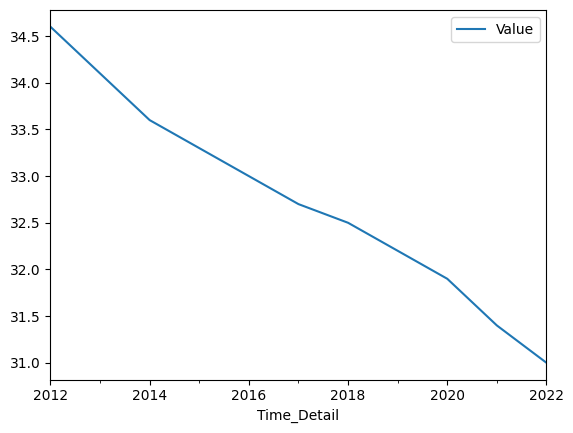

In [10]:
stunt12.plot()

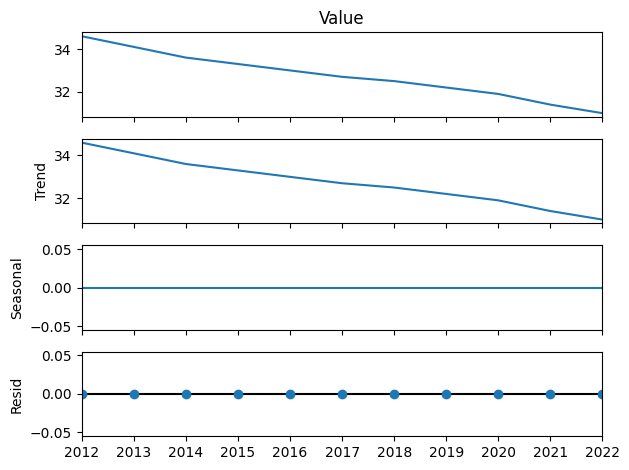

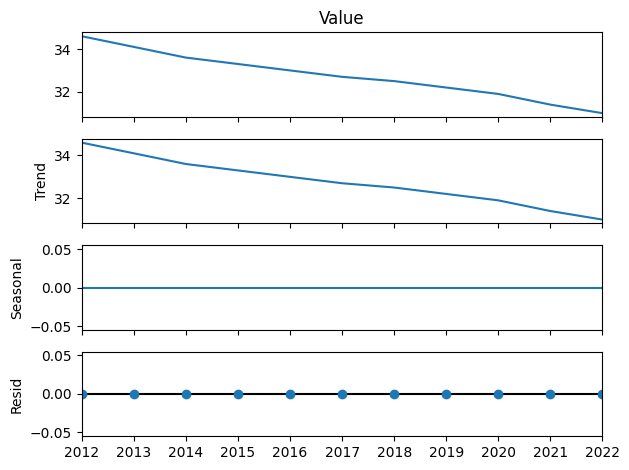

In [9]:
tren = seasonal_decompose(stunt12['Value'])
tren.plot()

In [ ]:
stunt12.columns = ['ds','y']
m = Prophet()
m.fit(stunt12)
future = m.make_future_dataframe(periods=10, freq='y')
m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4eikyb4q/5_ro27ve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4eikyb4q/kdop5dxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33196', 'data', 'file=/tmp/tmp4eikyb4q/5_ro27ve.json', 'init=/tmp/tmp4eikyb4q/kdop5dxj.json', 'output', 'file=/tmp/tmp4eikyb4q/prophet_modeltn6wgjr1/prophet_model-20230929140038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,4.074496,34.599977,34.599977,4.074496,4.074496,30.525481,30.525481,30.525481,30.525481,30.525481,30.525481,0.0,0.0,0.0,34.599977
1,2013-01-01,3.686975,34.100001,34.100001,3.686975,3.686975,30.413025,30.413025,30.413025,30.413025,30.413025,30.413025,0.0,0.0,0.0,34.100001
2,2014-01-01,3.200513,33.599992,33.599992,3.200513,3.200513,30.399479,30.399479,30.399479,30.399479,30.399479,30.399479,0.0,0.0,0.0,33.599992
3,2015-01-01,2.860955,33.299983,33.299983,2.860955,2.860955,30.439028,30.439028,30.439028,30.439028,30.439028,30.439028,0.0,0.0,0.0,33.299983
4,2016-01-01,2.474493,32.999974,32.999974,2.474493,2.474493,30.525481,30.525481,30.525481,30.525481,30.525481,30.525481,0.0,0.0,0.0,32.999974
5,2017-01-01,2.286972,32.699997,32.699997,2.286972,2.286972,30.413025,30.413025,30.413025,30.413025,30.413025,30.413025,0.0,0.0,0.0,32.699997
6,2018-01-01,2.100510,32.499989,32.499989,2.100510,2.100510,30.399479,30.399479,30.399479,30.399479,30.399479,30.399479,0.0,0.0,0.0,32.499989
7,2019-01-01,1.760952,32.199980,32.199980,1.760952,1.760952,30.439028,30.439028,30.439028,30.439028,30.439028,30.439028,0.0,0.0,0.0,32.199980
8,2020-01-01,1.374490,31.899971,31.899971,1.374490,1.374490,30.525481,30.525481,30.525481,30.525481,30.525481,30.525481,0.0,0.0,0.0,31.899971
9,2021-01-01,0.986969,31.399995,31.399995,0.986969,0.986969,30.413025,30.413025,30.413025,30.413025,30.413025,30.413025,0.0,0.0,0.0,31.399995


In [ ]:
datan = m.predict(future)

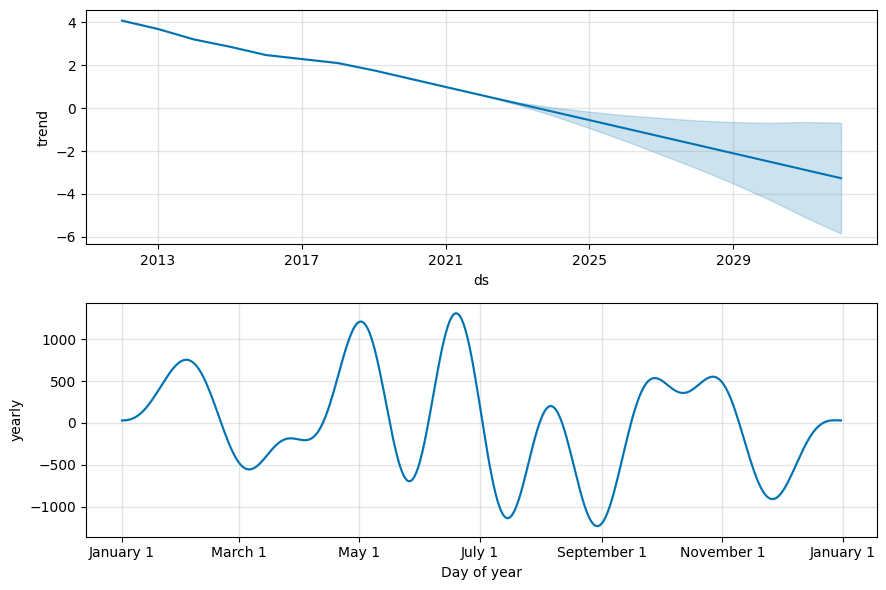

In [ ]:
fig = m.plot_components(datan)


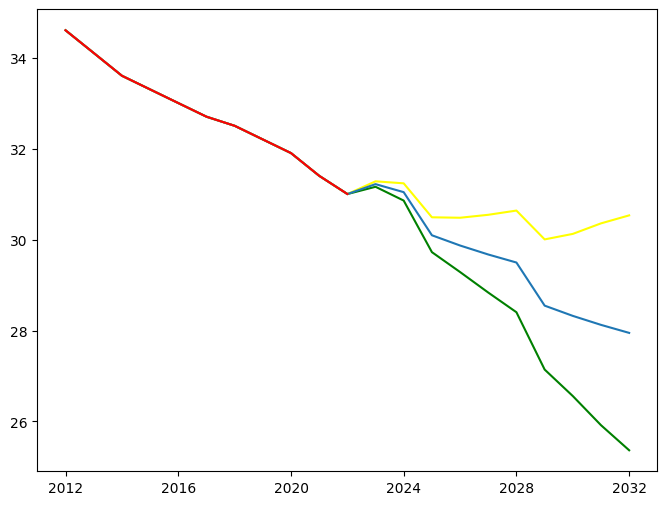

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(datan.ds, datan.yhat_lower, color='green')
plt.plot(datan.ds, datan.yhat_upper, color='yellow')
plt.plot(datan.ds, datan.yhat)
plt.plot(stunt12.ds, stunt12.y, color='red')

# with LSTM

In [13]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(np.array(stunt12['Value']),np.array(stunt12['Value']),length=n_input, batch_size=1)

In [15]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(generator, epochs=20)

Epoch 1/20
8/8 [==============================] - 2s 6ms/step - loss: 855.3921
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 543.7181
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 196.4963
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 11.2488
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 25.1423
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 8.4044
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.9601
Epoch 8/20
8/8 [==============================] - 0s 4ms/step - loss: 2.3908
Epoch 9/20
8/8 [==============================] - 0s 4ms/step - loss: 0.4832
Epoch 10/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1508
Epoch 11/20
8/8 [==============================] - 0s 5ms/step - loss: 0.2379
Epoch 12/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 13/20
8/8 [==============================] - 0s 4ms/step - 

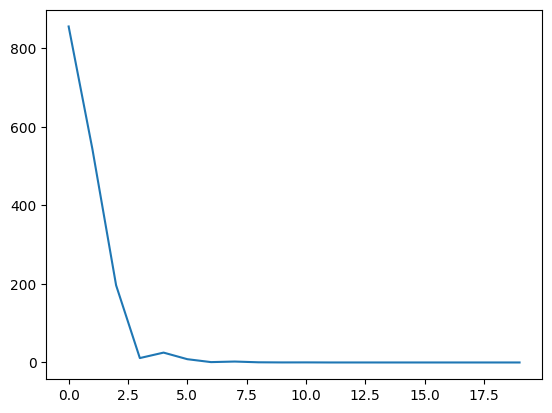

In [18]:
loss_epoch = model.history.history['loss']
plt.plot(range(len(loss_epoch)), loss_epoch)

In [32]:
a = stunt12['Value'].tolist().copy()

In [35]:
for i in range(12):
  a.append(model.predict(np.array(a)[-3:].reshape((1,3,1)))[0][0])
print(a)

1/1 [==============================] - 0s 27ms/step
[34.6, 34.1, 33.6, 33.3, 33.0, 32.7, 32.5, 32.2, 31.9, 31.4, 31.0, 30.645359, 30.16772, 29.730423, 29.273993, 28.767872, 28.262001, 27.725359, 27.156002, 26.565338, 25.939451, 25.278587, 24.58233]


In [49]:
a[13].dtype

dtype('float32')

([<matplotlib.axis.XTick at 0x7b1ea7c00520>,
 [Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2025, 0, '2025'),
  Text(2026, 0, '2026'),
  Text(2027, 0, '2027'),
  Text(2028, 0, '2028'),
  Text(2029, 0, '2029'),
  Text(2030, 0, '2030'),
  Text(2031, 0, '2031'),
  Text(2032, 0, '2032'),
  Text(2033, 0, '2033'),
  Text(2034, 0, '2034')])

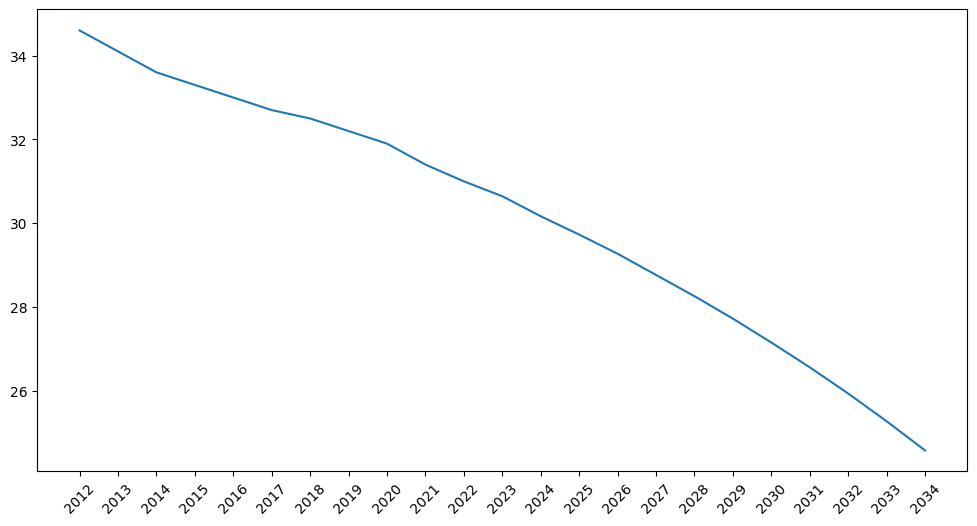

In [43]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(2012,2012+23)],a)
plt.xticks([i for i in range(2012,2012+23)], rotation=45)

In [45]:
hasil = pd.DataFrame({'tahun':[i for i in range(2012,2012+23)],
                      'nilai':a})
hasil

,tahun,nilai
0,2012,34.600000
1,2013,34.100000
2,2014,33.600000
3,2015,33.300000
4,2016,33.000000
5,2017,32.700000
6,2018,32.500000
7,2019,32.200000
8,2020,31.900000
9,2021,31.400000


In [46]:
hasil.to_csv('hasil_pred.csv', index=False)

In [50]:
hasil.to_excel('hasill.xlsx', index=False)

# Correlation Test

In [106]:
data1 = pd.read_csv('/content/drive/MyDrive/DAC RATIO/dataset/Data fiks banget/Salinan Kumpulan Data.csv', sep=';')

In [65]:
data1.columns

Index(['Provinsi', 'pkk2017', 'pkk2018', 'gb2016', 'gb2017', 'gb2018', 'p2016',
       'p2017', 'p2018', 'sp2016', 'sp2017', 'sp2018', 'rnw2017', 'rnw2018',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [107]:
data1 = data1[['Provinsi','pkk2017','gb2017','p2017','sp2017','rnw2017']]
data1 = data1.loc[:33,]

In [75]:
data1.corr()

,pkk2017,gb2017,p2017,sp2017,rnw2017
pkk2017,1.000000,0.395382,-0.033657,0.193493,0.186399
gb2017,0.395382,1.000000,0.492059,0.831209,0.561224
p2017,-0.033657,0.492059,1.000000,0.516013,0.310030
sp2017,0.193493,0.831209,0.516013,1.000000,0.541731
rnw2017,0.186399,0.561224,0.310030,0.541731,1.000000


In [69]:
from scipy.stats import pearsonr

In [87]:
pearsonr(data1['pkk2017'], data1['gb2017'])[0]

0.39538238684012683

In [81]:
import itertools

In [84]:
a = itertools.combinations(data1.columns,2)

In [86]:
[' '.join(i) for i in a]

['pkk2017 gb2017',
 'pkk2017 p2017',
 'pkk2017 sp2017',
 'pkk2017 rnw2017',
 'gb2017 p2017',
 'gb2017 sp2017',
 'gb2017 rnw2017',
 'p2017 sp2017',
 'p2017 rnw2017',
 'sp2017 rnw2017']

In [90]:
kolom1[1]

'pkk2017'

In [91]:
kolom1 = ['pkk2017','pkk2017','pkk2017','pkk2017','gb2017','gb2017','gb2017','p2017','p2017','sp2017']
kolom2 = ['gb2017','p2017','sp2017','rnw2017','p2017','sp2017','rnw2017','sp2017','rnw2017','rnw2017']
kolomp = []
kolompv = []
for i in range(len(kolom1)):
  kolomp.append(pearsonr(data1[kolom1[i]], data1[kolom2[i]])[0])
  kolompv.append(pearsonr(data1[kolom1[i]], data1[kolom2[i]])[1])
kolomc = ['significant' if kolompv[i] < 0.05 else 'not significant' for i in range(len(kolom1))]

In [92]:
pd.DataFrame({'var_1':kolom1,
 'var_2':kolom2,
 'pearson':kolomp,
 'p_value':kolompv,
 'conclusion':kolomc})

,var_1,var_2,pearson,p_value,conclusion
0,pkk2017,gb2017,0.395382,2.064422e-02,significant
1,pkk2017,p2017,-0.033657,8.501198e-01,not significant
2,pkk2017,sp2017,0.193493,2.728822e-01,not significant
3,pkk2017,rnw2017,0.186399,2.911888e-01,not significant
4,gb2017,p2017,0.492059,3.117938e-03,significant
5,gb2017,sp2017,0.831209,1.153705e-09,significant
6,gb2017,rnw2017,0.561224,5.542230e-04,significant
7,p2017,sp2017,0.516013,1.785393e-03,significant
8,p2017,rnw2017,0.310030,7.435666e-02,not significant
9,sp2017,rnw2017,0.541731,9.364036e-04,significant


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [94]:
# Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(data1.astype(float))

# k-means clustering
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_
labels1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [101]:
new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['pkk2017','gb2017','p2017','sp2017','rnw2017'])
new_dfoutlier_std['label_kmeans1'] = labels1

In [102]:
new_dfoutlier_std

,pkk2017,gb2017,p2017,sp2017,rnw2017,label_kmeans1
0,-0.290629,0.995097,1.158937,0.459360,0.296278,0
1,-0.414070,0.599386,-1.235949,0.552510,-0.017267,1
2,-0.641396,-0.719651,0.456437,-0.441095,0.258475,1
3,-0.264963,-0.126084,-0.437654,0.148858,-0.228520,1
4,0.019807,-0.917506,-1.108222,-0.596346,-0.655474,1
5,-0.404292,-1.511072,-1.587199,-0.875798,-0.266323,1
6,0.211690,-1.379169,0.296778,-0.658446,-0.181822,1
7,-0.192854,-0.587747,0.520301,-0.192694,-0.224072,1
8,-0.142744,-0.455843,-0.597313,-0.441095,-1.344827,1
9,-0.817391,-0.917506,-1.140154,-1.869403,-0.304126,1


In [103]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(new_dfoutlier_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_dfoutlier_std,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.3611069019839026
Silhouette score for k(clusters) = 3 is 0.3861091986531738
Silhouette score for k(clusters) = 4 is 0.3058299809169106
Silhouette score for k(clusters) = 5 is 0.3091437699353058
Silhouette score for k(clusters) = 6 is 0.3022680880303667
Silhouette score for k(clusters) = 7 is 0.27571840237935014
Silhouette score for k(clusters) = 8 is 0.23538986871232387


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette score for k(clusters) = 9 is 0.20943545544169528
Silhouette score for k(clusters) = 10 is 0.20928884189077415
Silhouette score for k(clusters) = 11 is 0.20920301698318972
Silhouette score for k(clusters) = 12 is 0.20564979806386138


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
# Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(data1.astype(float))

# k-means clustering
kmeans1 = KMeans(n_clusters=3, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_
labels1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [109]:
data1['label'] = labels1

In [110]:
data1.to_excel('label_kluster.xlsx', index=False)